# Data Exploration

* `Explore dataset structure`

* `Explore univariate distributions`

* `Explore bivariate relationships`

* `Explore multivariate relationships`

* `Explore outliers`

* `Explore missing values`

---

Import Python libraries

In [156]:
import pandas as pd
import numpy as np

In [157]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# This line allows for inline plotting in Jupyter Notebooks, displaying plots directly below the code cells.
%matplotlib inline

In [158]:
import seaborn as sns

Run utilities

In [159]:
%run __functions__.ipynb

Load Titanic dataset

> For detailed dataset description please see: [Kaggle](https://www.kaggle.com/c/titanic/data)

In [160]:
df = pd.read_csv("data/Titanic/train.csv")

### **Explore dataset structure**

> - **Rows**
> - **Columns**
> - **Column types**
> - **Examples**

##### Rows / Sample size

In [161]:
print(f"df contains {len(df)} rows.")

df contains 891 rows.


##### Columns

In [162]:
print(f"df contains {len(df.columns)} columns:")

for column in df.columns:
    print("* " + column)

df contains 12 columns:
* PassengerId
* Survived
* Pclass
* Name
* Sex
* Age
* SibSp
* Parch
* Ticket
* Fare
* Cabin
* Embarked


##### Shape

In [163]:
df.shape

(891, 12)

##### Column types
  
>Pandas Data Frames can handle a variety of data types in their columns.
>These data types are usually based on NumPy's data types, as Pandas is built on top of NumPy.
>Here's a summary of the common data types that columns in a Pandas DataFrame can have:

**1. Numeric types**  
<u>int64</u>: Integer data type for 64-bit integers.  
<u>float64</u>: Floating-point data type for 64-bit floats.  
<u>complex128</u>: Complex number data type with 128-bit precision.  

**2. Boolean type**  
<u>bool</u>: Boolean data type, representing True or False values.  

**3. Object type**  
<u>object</u>: A general-purpose data type for arbitrary Python objects, often used for strings or mixed data types. Columns of this type can hold any data type, but it's most commonly used for text data.  

**4. String type**  
<u>string</u>: A specialized string data type, introduced in Pandas 1.0, that is more efficient and consistent than using object for strings.  

**5. Datetime and Timedelta types**  
<u>datetime64[ns]</u>: Date and time data type with nanosecond precision.  
<u>timedelta64[ns]</u>: Data type for time differences (durations) with nanosecond precision.  

**6. Categorical type**  
<u>category</u>: A data type for categorical variables, which can take on a limited and usually fixed number of possible values (categories). This is more memory-efficient than using object or string.  

Display column types

In [164]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Change column types

In [165]:
df = df.astype(
    {
        "PassengerId": "int64",
        "Survived": "category",
        "Pclass": "category",
        "Name": "string",
        "Sex": "category",
        "Age": "float64",
        "SibSp": "category",
        "Parch": "category", 
        "Ticket": "string",
        "Fare": "float64",
        "Cabin": "string",
        "Embarked": "category"
    }
)

df.dtypes

PassengerId             int64
Survived             category
Pclass               category
Name           string[python]
Sex                  category
Age                   float64
SibSp                category
Parch                category
Ticket         string[python]
Fare                  float64
Cabin          string[python]
Embarked             category
dtype: object

##### Examples

Display n first/last rows

In [166]:
display(df.head(1))
display(df.tail(1))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,<NA>,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,<NA>,Q


Display sorted by column

In [167]:
display(df.sort_values(by=["Survived", "Name"], ascending=[False, True]).head(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,<NA>,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,<NA>,C
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.35,<NA>,S


### **Explore univariate distributions**

> - **<u>Discrete</u> distributions**
> - **<u>Continuous</u> distributions**

##### <u>Discrete</u> distributions

In [168]:
categorical_cols = df.select_dtypes(include="category").columns.to_list()

In [169]:
print(categorical_cols)

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


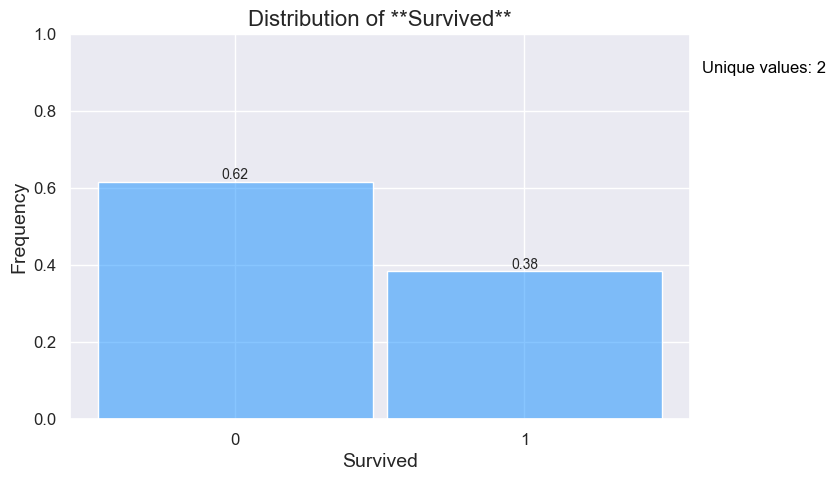

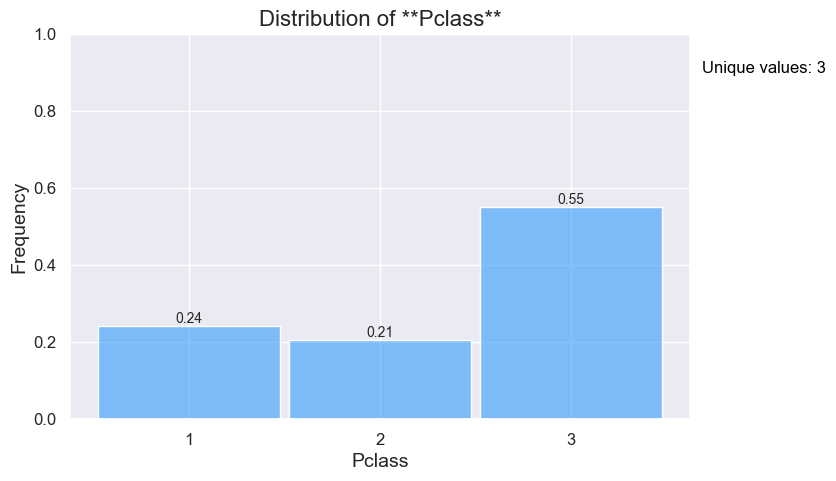

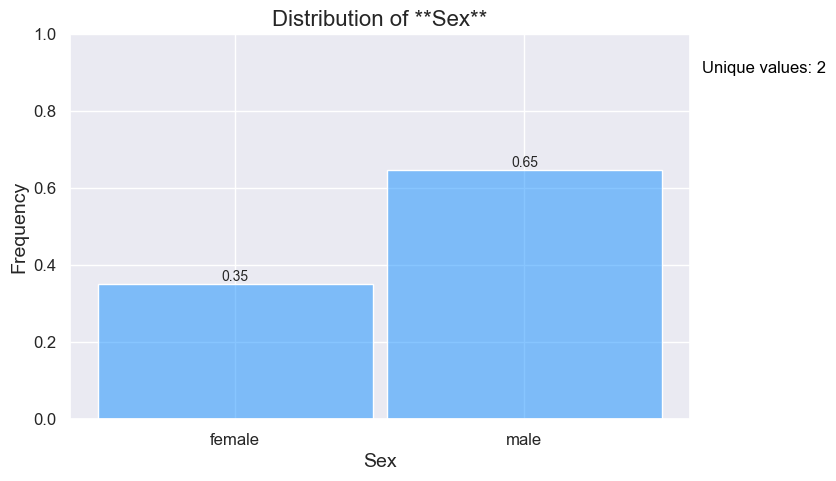

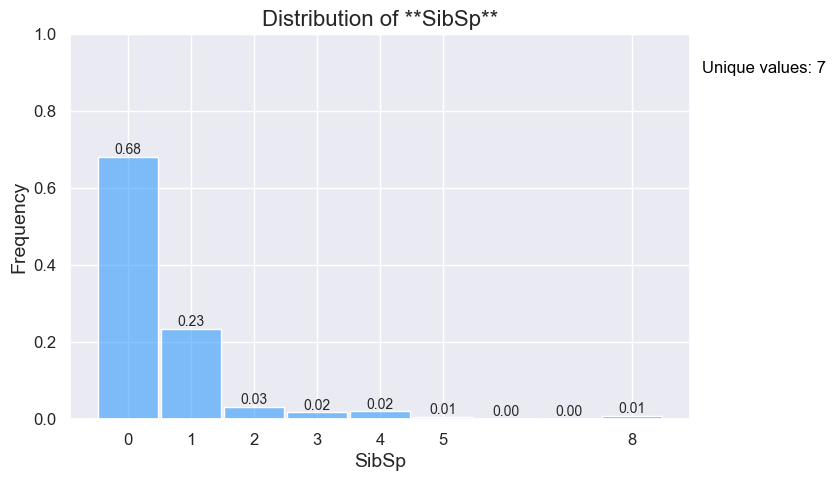

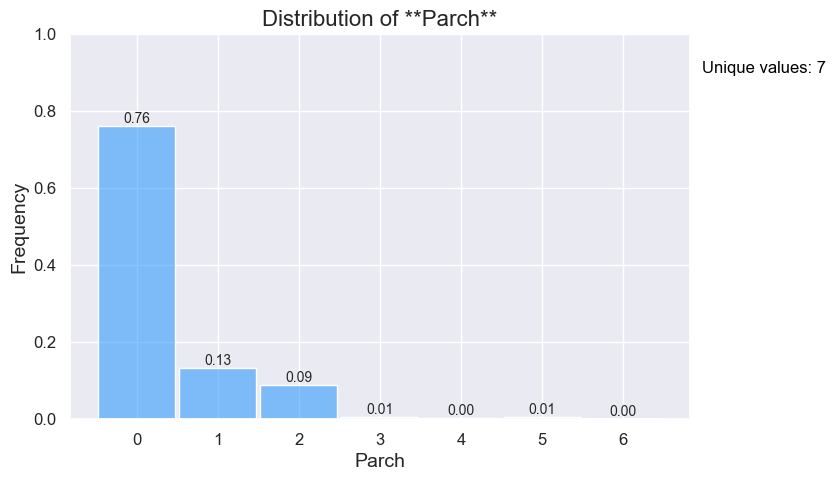

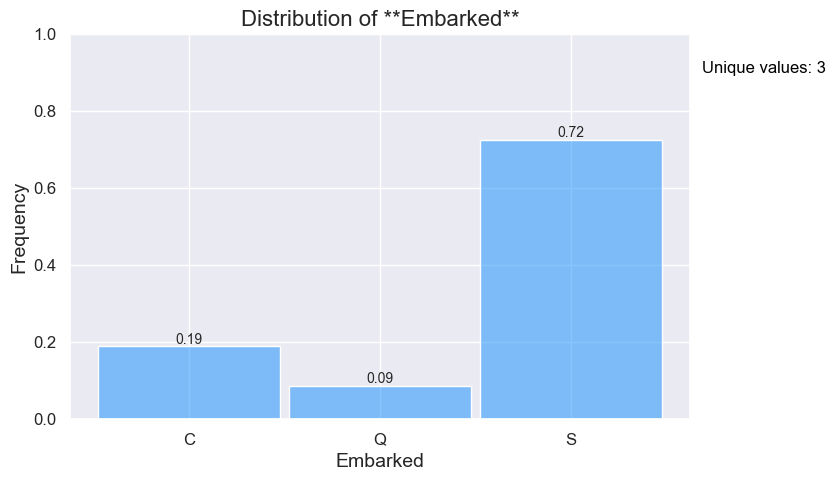

In [170]:
explore_univariate_distribution(
    data=df, columns=categorical_cols, dist_type="discrete", relative_frequency=True
)

##### **<u>Continuous</u> distributions**

In [171]:
numerical_cols = df.select_dtypes(include="number").columns.to_list()

In [172]:
print(numerical_cols)

['PassengerId', 'Age', 'Fare']


In [173]:
# Drop ID column
numerical_cols.remove("PassengerId")

In [174]:
print(numerical_cols)

['Age', 'Fare']


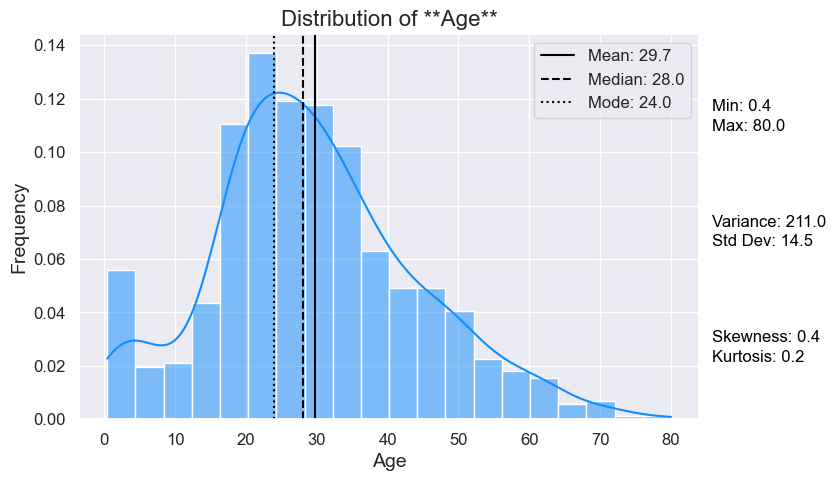

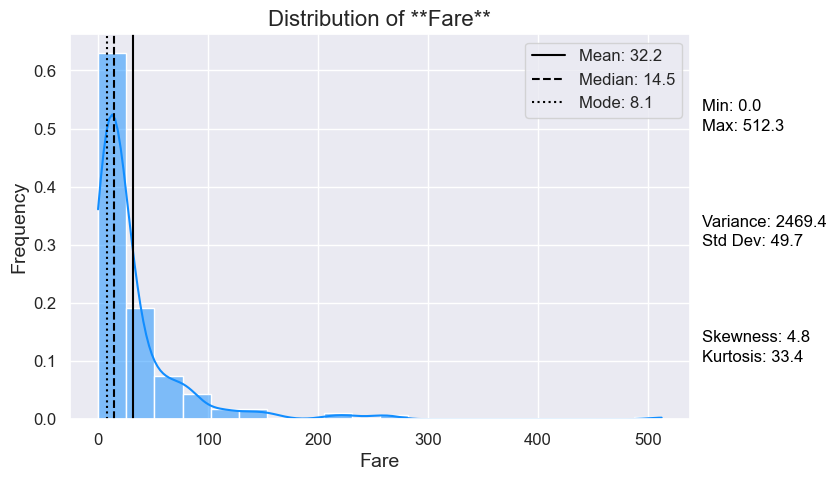

In [175]:
explore_univariate_distribution(
    data=df, columns=numerical_cols, dist_type="continuous", n_bins=20
)

### **Excursus: Sweetviz Library**

In [176]:
%pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [177]:
import sweetviz as sv

In [178]:
#report = sv.analyze(df)
#report.show_html('sweetviz_report.html')

### **Explore bivariate relationships**

Continuous features:


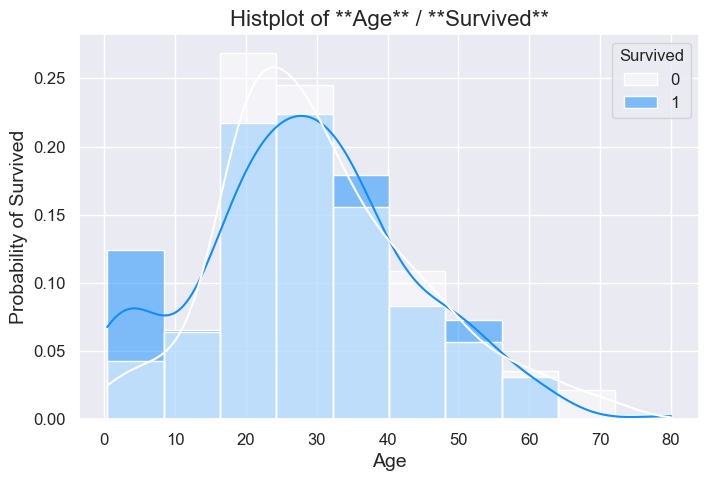

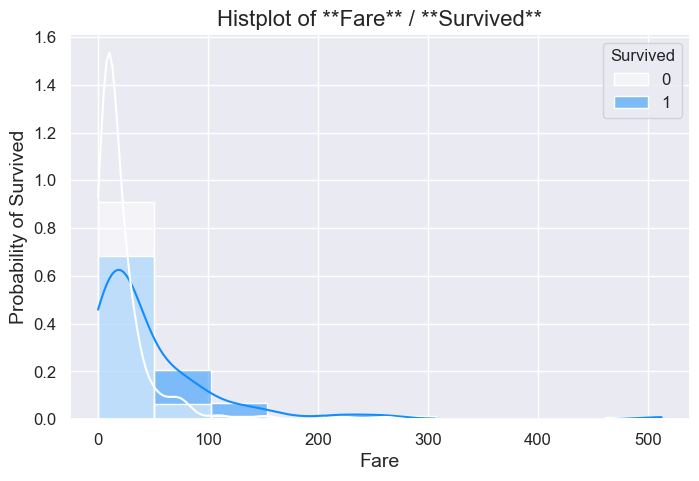

Discrete features:


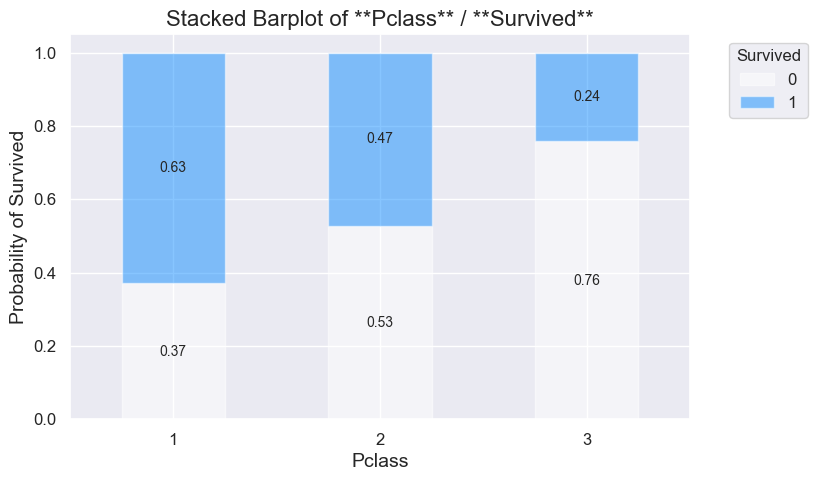

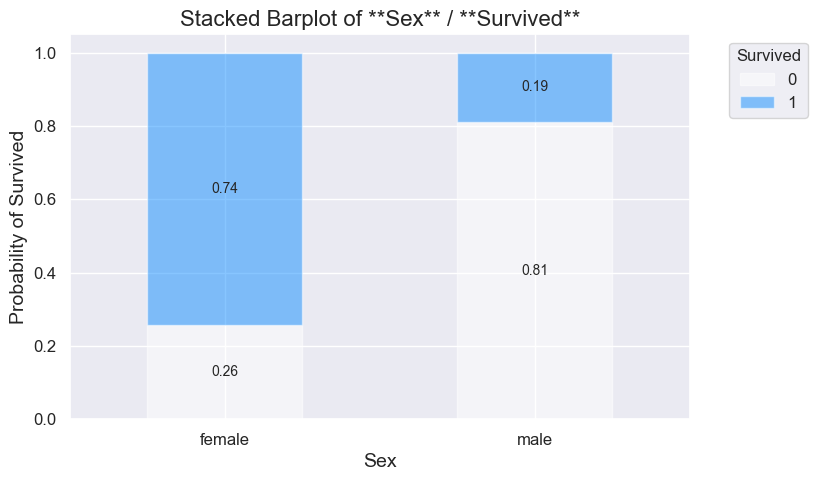

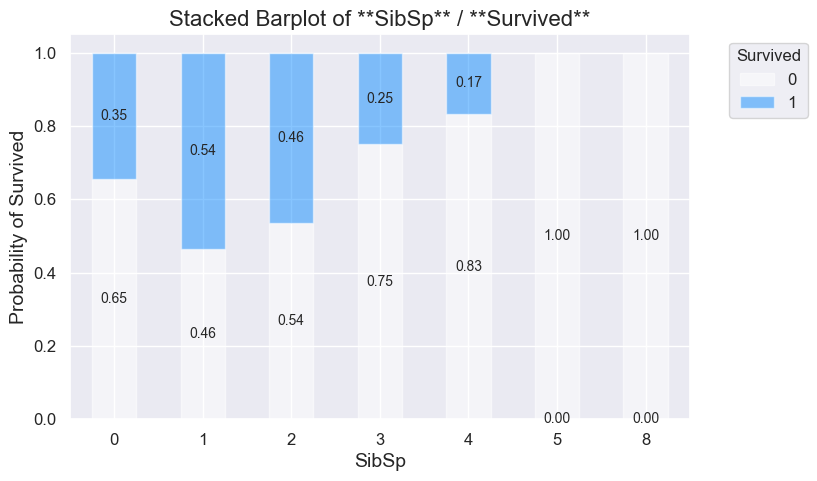

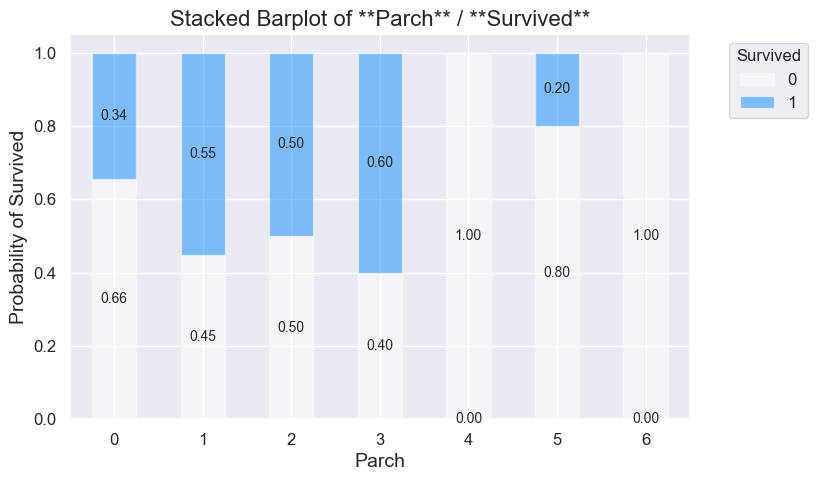

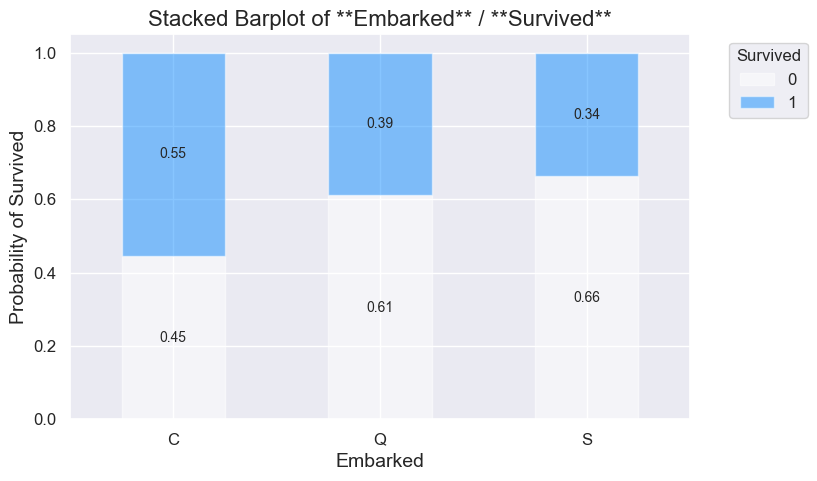

In [179]:
explore_bivariate_relationships(
    data=df,
    categorical_columns=categorical_cols,
    numerical_columns=numerical_cols,
    y_column="Survived",
    y_type="discrete",
)

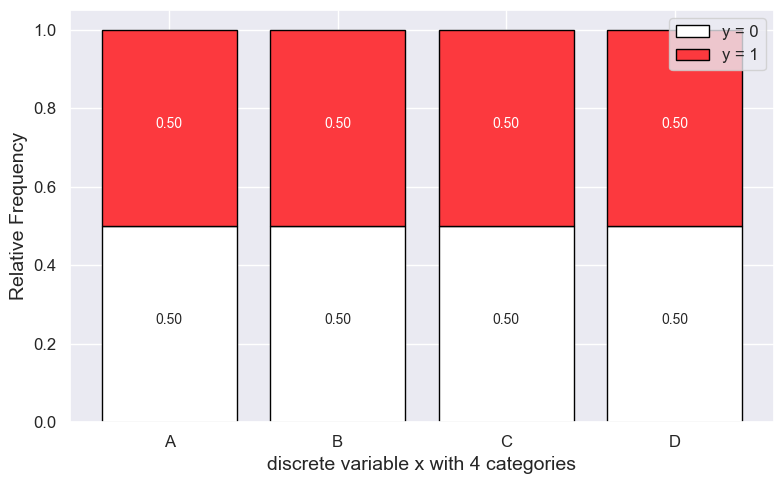

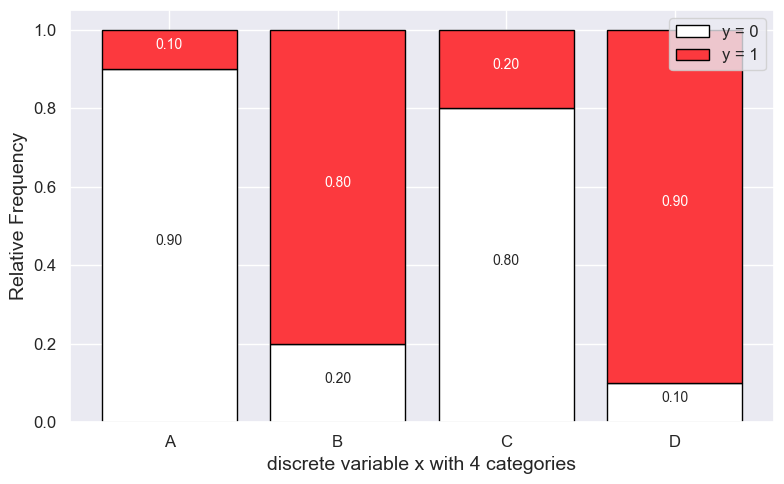

In [180]:
# Create DataFrames for weak and strong correlation manually

# Weak correlation: Equal proportion of 0 and 1 in all x categories
data_weak = {
    'x': ['A', 'B', 'C', 'D'],
    'y_0': [25, 25, 25, 25],  # Proportion of y = 0
    'y_1': [25, 25, 25, 25]   # Proportion of y = 1
}

# Strong correlation: y is mostly 0 for 'A' and 'C', mostly 1 for 'B' and 'D'
data_strong = {
    'x': ['A', 'B', 'C', 'D'],
    'y_0': [45, 10, 40, 5],    # Proportion of y = 0
    'y_1': [5, 40, 10, 45]     # Proportion of y = 1
}

# Convert to DataFrames
df_weak = pd.DataFrame(data_weak)
df_strong = pd.DataFrame(data_strong)

# Function to plot stacked bar charts with relative frequency and labels
def plot_stacked_bar(df):
    # Calculate relative frequencies (probability)
    df['total'] = df['y_0'] + df['y_1']
    df['y_0_prob'] = df['y_0'] / df['total']
    df['y_1_prob'] = df['y_1'] / df['total']

    # Plot the stacked bar chart
    fig, ax = plt.subplots()
    bars_y0 = ax.bar(df['x'], df['y_0_prob'], label='y = 0', color='white', edgecolor='black')
    bars_y1 = ax.bar(df['x'], df['y_1_prob'], bottom=df['y_0_prob'], label='y = 1', color='#FC393E', edgecolor='black')

    # Add value labels on top of the bars
    for bar in bars_y0:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height / 2),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='center', fontsize=10)

    for bar in bars_y1:
        height = bar.get_height() + bar.get_y()
        ax.annotate(f'{bar.get_height():.2f}', xy=(bar.get_x() + bar.get_width() / 2, height - bar.get_height() / 2),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='center', fontsize=10, color='white')

    # Customize plot
    plt.xlabel('discrete variable x with 4 categories')
    plt.ylabel('Relative Frequency')
    plt.legend(loc='upper right')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Plot the weak correlation example
plot_stacked_bar(df_weak)

# Plot the strong correlation example
plot_stacked_bar(df_strong)


In [181]:
from scipy.stats import chi2_contingency

# Create DataFrames for weak and strong correlation manually

# Weak correlation: Equal proportion of 0 and 1 in all x categories
data_weak = {
    'x': ['A', 'B', 'C', 'D'],
    'y_0': [25, 25, 25, 25],  # Proportion of y = 0
    'y_1': [25, 25, 25, 25]   # Proportion of y = 1
}

# Strong correlation: y is mostly 0 for 'A' and 'C', mostly 1 for 'B' and 'D'
data_strong = {
    'x': ['A', 'B', 'C', 'D'],
    'y_0': [45, 10, 40, 5],    # Proportion of y = 0
    'y_1': [5, 40, 10, 45]     # Proportion of y = 1
}

# Convert to DataFrames
df_weak = pd.DataFrame(data_weak)
df_strong = pd.DataFrame(data_strong)

# Function to calculate Cramér's V
def cramers_v(df):
    # Create contingency table
    contingency_table = df[['y_0', 'y_1']].values
    
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate Cramér's V
    n = contingency_table.sum()  # Total number of observations
    num_rows, num_cols = contingency_table.shape  # Number of rows (categories of x) and columns (categories of y)
    v = np.sqrt(chi2 / (n * min(num_rows - 1, num_cols - 1)))
    
    return v

# Calculate Cramér's V for weak and strong correlation
v_weak = cramers_v(df_weak)
v_strong = cramers_v(df_strong)

print(f"Cramér's V (Weak Correlation): {v_weak:.4f}")
print(f"Cramér's V (Strong Correlation): {v_strong:.4f}")


Cramér's V (Weak Correlation): 0.0000
Cramér's V (Strong Correlation): 0.7071


### `Multivariate statistics`

### `Outliers`

### `Missing values`